In [176]:
import pandas as pd

In [177]:
import warnings
warnings.filterwarnings(action='ignore')

In [178]:
import matplotlib.pyplot as plt

In [179]:
import seaborn as sns

In [208]:
%matplotlib inline

In [209]:
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [181]:
energy=pd.read_csv("한국전력공사_전기차충전소충전량(202001_202006).csv",encoding="cp949")
energy2=pd.read_csv("한국전력공사_전기차충전소충전량(202007_202012).csv",encoding="cp949")
energy3=pd.read_csv("한국전력공사_전기차충전소충전량(202101_202106).csv",encoding="cp949")
energy4=pd.read_csv("한국전력공사_전기차충전소충전량(202107_202112).csv",encoding="cp949")

In [182]:
energy['지역']=energy['주소'].str.split(" ").str.get(0)
energy2['지역']=energy2['주소'].str.split(" ").str.get(0)
energy3['지역']=energy3['주소'].str.split(" ").str.get(0)
energy4['지역']=energy4['주소'].str.split(" ").str.get(0)
energy=energy[['지역','충전기구분','충전량']]
energy2=energy2[['지역','충전기구분','충전량']]
energy3=energy3[['지역','충전기구분','충전량']]
energy4=energy4[['지역','충전기구분','충전량']]


In [183]:
seoul1 = energy[energy['지역']=='서울특별시']
seoul2 = energy2[energy2['지역']=='서울특별시']
seoul3 = energy3[energy3['지역']=='서울특별시']
seoul4 = energy4[energy4['지역']=='서울특별시']

In [184]:
seoul_2020 = pd.concat([seoul1,seoul2])
seoul_2021 = pd.concat([seoul3,seoul4])

In [185]:
seoul_2020.reset_index(drop=True,inplace=True)
seoul_2021.reset_index(drop=True,inplace=True)

In [186]:
# seoul = pd.concat([pd.concat([pd.concat([seoul1,seoul2]),seoul3]),seoul4])

In [187]:
seoul_2020.drop(columns='지역',inplace=True)
seoul_2021.drop(columns='지역',inplace=True)

In [188]:
seoul_2020=seoul_2020.groupby(['충전기구분'])['충전량'].sum().reset_index()

In [189]:
seoul_2021=seoul_2021.groupby(['충전기구분'])['충전량'].sum().reset_index()

In [223]:
seoul_2020['충전량']=seoul_2020['충전량'].astype(int)
seoul_2021['충전량']=seoul_2021['충전량'].astype(int)


In [213]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus']=False  

In [ ]:
plt.plot()

<Axes: xlabel='충전기구분', ylabel='충전량'>

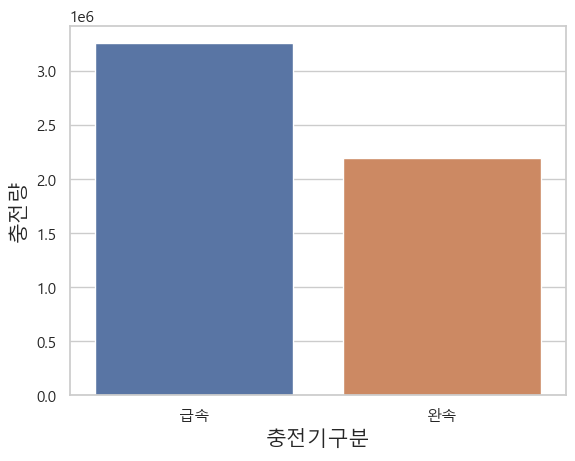

In [215]:
sns.barplot(x="충전기구분", y="충전량", data=seoul_2020)

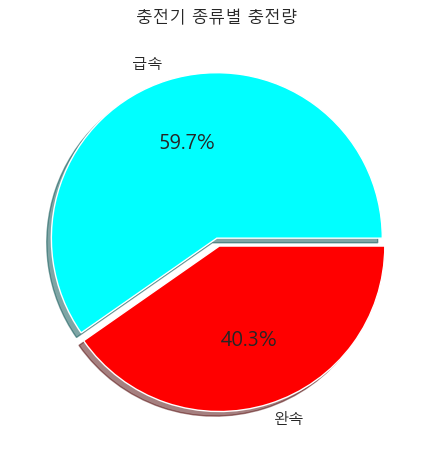

In [239]:
colors = ['aqua', 'red']
explode = [0, 0.05]
plt.pie(seoul_2020['충전량'],labels=seoul_2020['충전기구분'],autopct='%.1f%%',explode=explode,shadow=True,colors=colors)
plt.title('충전기 종류별 충전량')
plt.tight_layout()
plt.show()